# Linear Regression¶
### Geely Automotive Pricing Model


##### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

#### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


#### Data
CarPrice_Assignment.csv

#### Let's Start by importing all the required library packages.

#### Step1. Importing and Understanding Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import pandas as pd
import numpy as np

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns

# module for performing test train split
from sklearn.model_selection import train_test_split

# Module for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Module for statmodel linear regression
import statsmodels.api as sm

# importing VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
cars = pd.read_csv(r'D:\ML_Upgrad\Assignments\My\Assignment_3_CarPrice\data\CarPrice_Assignment.csv')
# Check the head of the dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# looking at the shape of cars
cars.shape

(205, 26)

In [5]:
# looking at the info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# looking at various aspects such as mean median etc..
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### All the common functions used in the notebook

In [7]:
# Creating a function for dealing with junk data such as mazda - maxda etc..
def name_correction(x, y):
    cars.CompanyName.replace(x, y, inplace=True)

In [8]:
# Plot the percentage of car's in the US market with respect to different car features
def plot_cat_counts(dataframe, var_list, sortbyindex=False):
    plt.figure(figsize=(25, 20))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts())
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('count in dataset', fontsize=16, weight = 'bold')
        ax.set_xlabel(var, fontsize=8, weight = 'bold')
        ax.xaxis.set_label_coords(1.05, -0.025)
        

In [9]:
#Function to plot a list of categorical variables together
def plot_cat_target(var_list):
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(4,3,var_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = cars)
    plt.show()

In [10]:
#Function to plot a list of categorical variables together
def plot_num_target(var_list):
    plt.figure(figsize=(20, 20))
    for var in var_list:
        plt.subplot(4,3,var_list.index(var)+1)
        sns.scatterplot(x = var, y = 'price', data = cars)
    plt.show()

In [11]:
# Creating it, to map the vars
def deal_with_dummies(var,dataframe):
    var1 = pd.get_dummies(dataframe[var], drop_first = True)
    dataframe = pd.concat([dataframe, var1], axis = 1)
    dataframe.drop([var], axis = 1, inplace = True)
    return dataframe

In [12]:
# Building the stats model
def building_stats_model(X,y):
    #Adding the constant
    X = sm.add_constant(X) 
    
     # fitting the model
    lm = sm.OLS(y,X).fit()
    
    # model summary
    print(lm.summary()) 
    return X

In [13]:
# calculate the VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Step2. Data Cleaning

In [14]:
# percentage of missing values in each column
round(cars.isnull().sum()/len(cars.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Looking at the result, it is clear that data is clean in terms of missing values.

Now we should deal with duplicates, if any

In [15]:
# Dropping Duplicates if any
cars=cars.drop_duplicates()

In [16]:
# looking at shape again after dropping duplicates
cars.shape

(205, 26)

Looks like there is not any duplicates, so data is clean in terms of missing values and duplicacy. Great!

In [17]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

We will not be requiring 'car_ID' column for regression, so dropping this column right away.

Also, variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. So splitting company name from CarName column

In [18]:
# dropping car id column
cars.drop('car_ID',axis=1,inplace=True)

In [19]:
#Splitting company name from CarName column, 
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)

# dropping CarName, as only CompanyName is our categorical variable
cars.drop(['CarName'],axis=1,inplace=True)
cars.head(5)

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# Checking the unique ness of the Column CompanyName
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There is clearly junk data in terms of spell mistake and Lower/UpperCase problem

So we have to first deal with that, to make the data clear

In [21]:
# making the CompanyName as lowercase to maintain symmetry
cars['CompanyName'] = cars['CompanyName'].str.lower()

# checking for uniqueness again
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Looking at the data there are many invalid values. There seems to be some spelling error in the CompanyName column. 
Correcting them with original values:
    
    maxda = mazda                      -> mazda
    porsche = porcshce                 -> porsche
    toyota = toyouta                   -> toyota
    vokswagen = volkswagen = vw        -> volkswagen

In [22]:
# Treating invalid values
name_correction('maxda','mazda')
name_correction('porcshce','porsche')
name_correction('toyouta','toyota')
name_correction('vokswagen','volkswagen')
name_correction('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [23]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Step 3. Data Visualization



Let's look at the details of target variable

In [24]:
# looking at price details
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

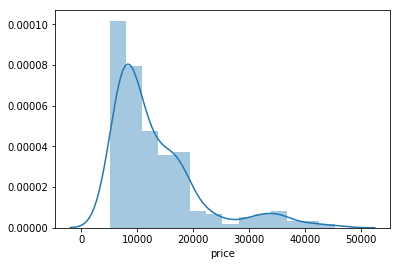

In [25]:
sns.distplot(cars['price'])

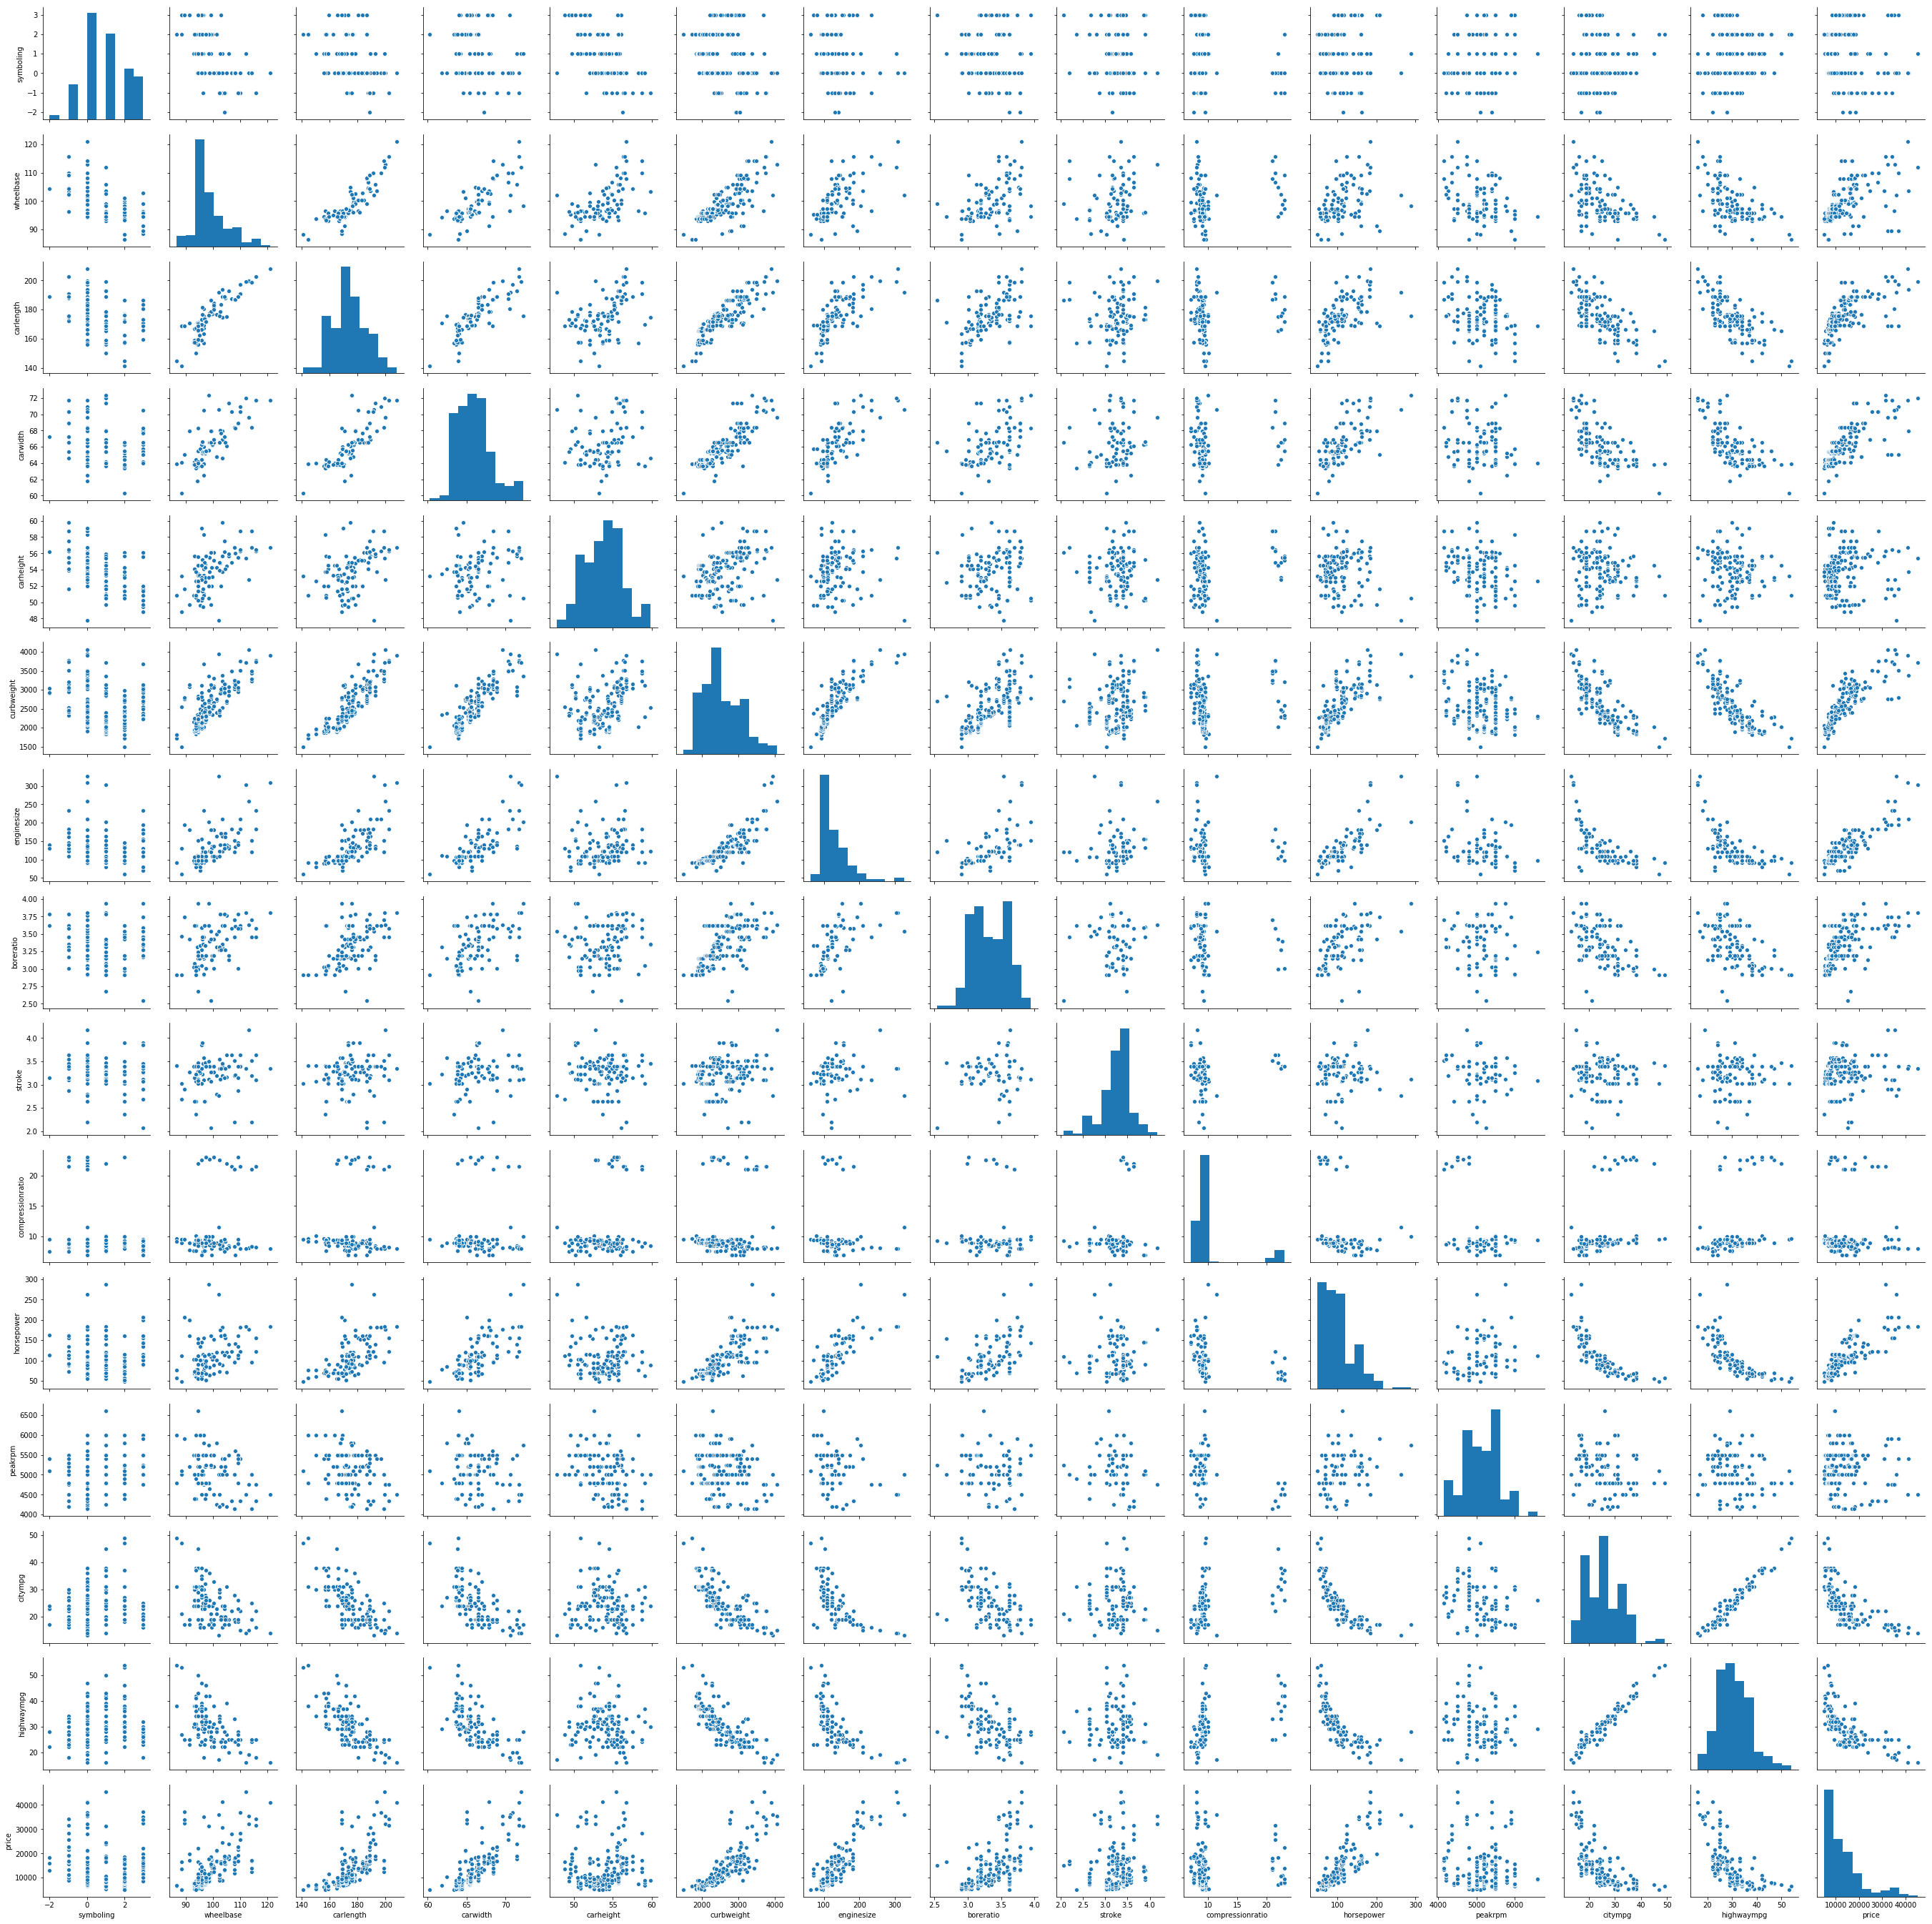

In [26]:
sns.pairplot(cars)
plt.show()

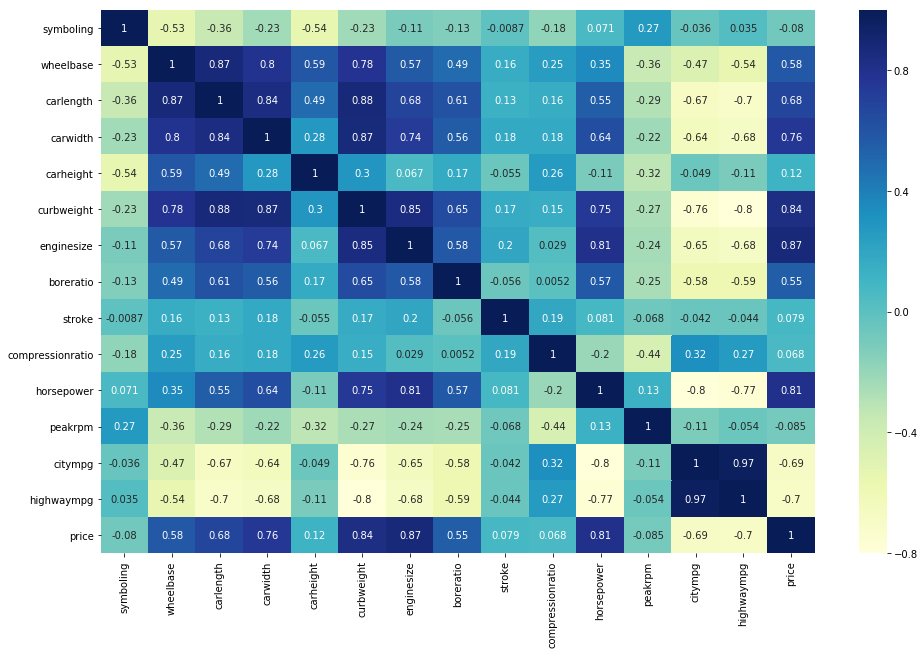

In [27]:
plt.figure(figsize = (16, 10))
correlation = cars.corr()
sns.heatmap(correlation, annot = True, cmap="YlGnBu")
plt.show()

From this, We can see that some features has some kind of positive correlation going on with the price like:
-  wheelbase -> 0.58,
-  carlength -> 0.68,
-  carwidth -> 0.76,
-  curbweight -> 0.84,
-  enginesize -> 0.87,
-  boreratio -> 0.55,
-  horsepower -> 0.81.

Also, few variables showing a negative correlation with price variable like,
-  citympg -> -0.69,
-  highwaympg -> -0.7.

We will further explore these. 
For now we know there is some relationship going on with the price variable.


##### As can be seen, there is some obvious multicollinearity going on.
Positive corelation can been seen among varaibles: 

    - carlength with wheelbase, carwidth, curbweight
    - carlength with wheelbase, carwidth, curbweight
    - curbweight with enginesize, carlength, carwidth, wheelbase
    - enginesize with horsepower, crubweight and dimestions of car
    - highway and city mpg's are highly correlated -> 0.97, so we can drop one of these very easily.
    

Negative corelation can also been seen among varaibles: 

    - horsepower with the highwaympg,citympg's
    - crubweight with the highwaympg,citympg's

In [28]:
cars.drop(['highwaympg'],axis=1,inplace=True)

In [29]:
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


#### Dealing with categorical variables


Symboling is a categorical variable.
Here Symboling is the assigned insurance risk rating,
A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
Let's make the category clear by classifying based on risk
-  -ve symboling as **safe**
-  0, 1 as **moderate**
-  2,3 as **risky** 

In [30]:
cars['symboling'] = cars['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [31]:
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,risky,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,risky,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,moderate,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,risky,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,risky,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


#### Visualising Categorical Variables

First lets get the list of categorical variables.

As seen from the Data Dictionary - carprices.xlsx we may get the list of Categorical variables which are: CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber and fuelsystem

In [32]:
categorical_variables = ['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                         'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

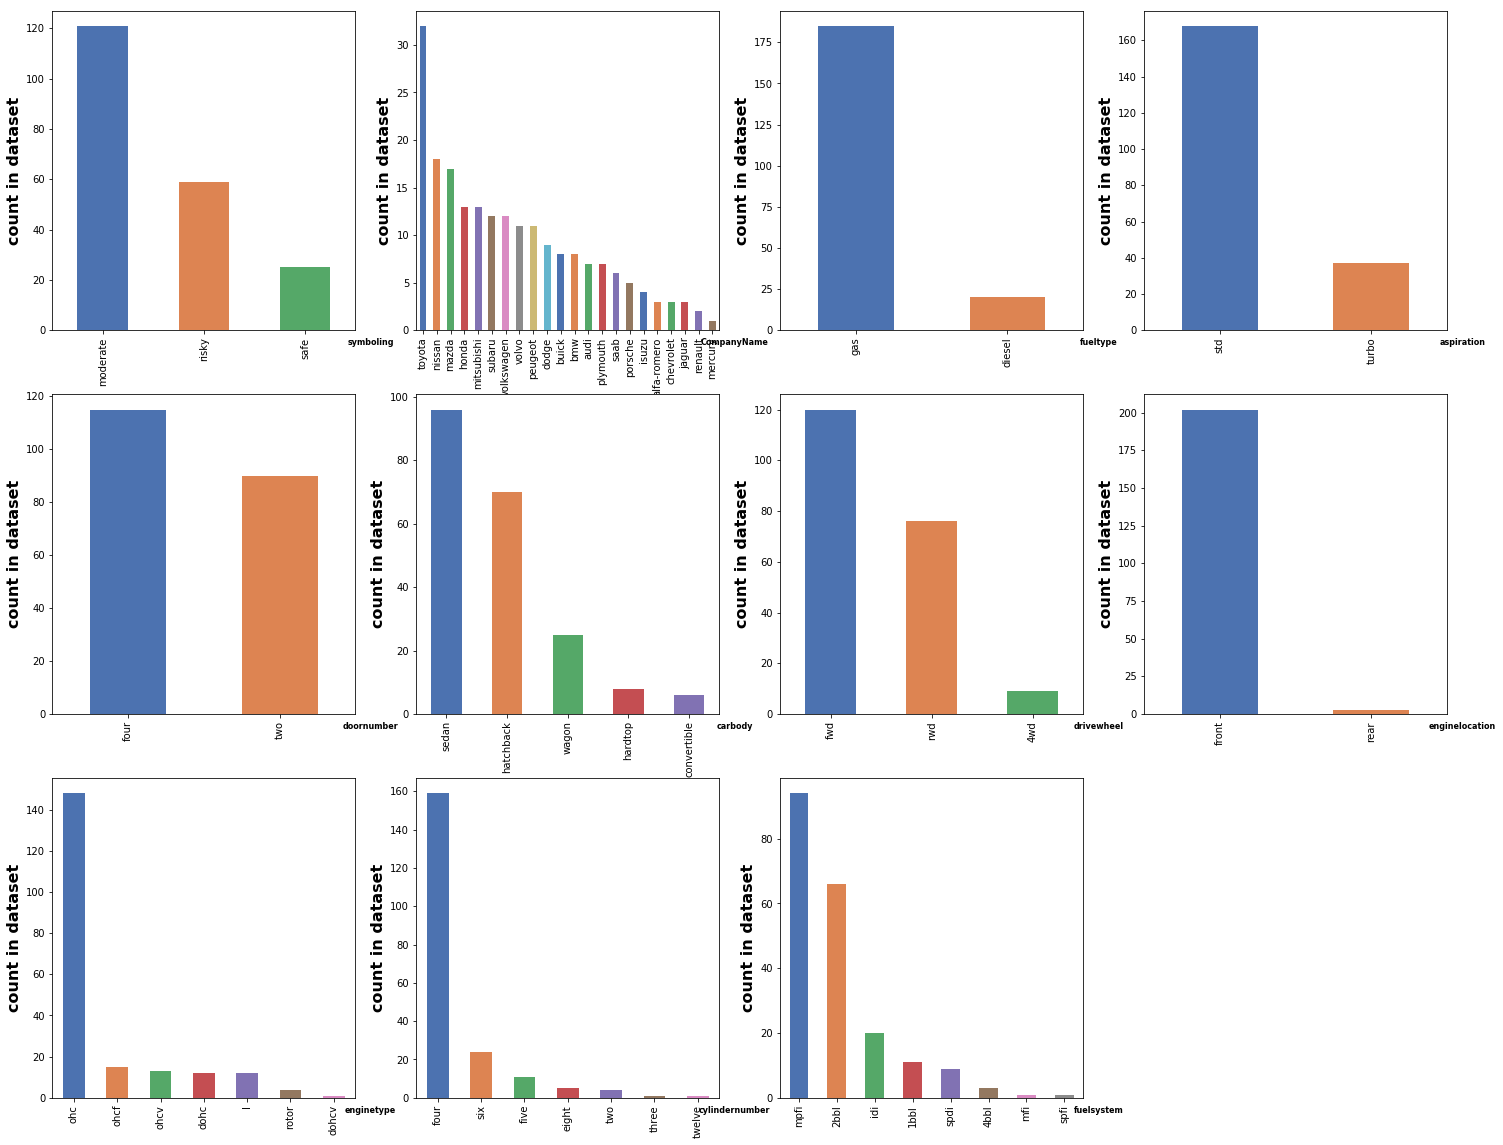

In [33]:
plot_cat_counts(cars,categorical_variables[:])

Lets also visualize categorical var vs target var(price) graphs

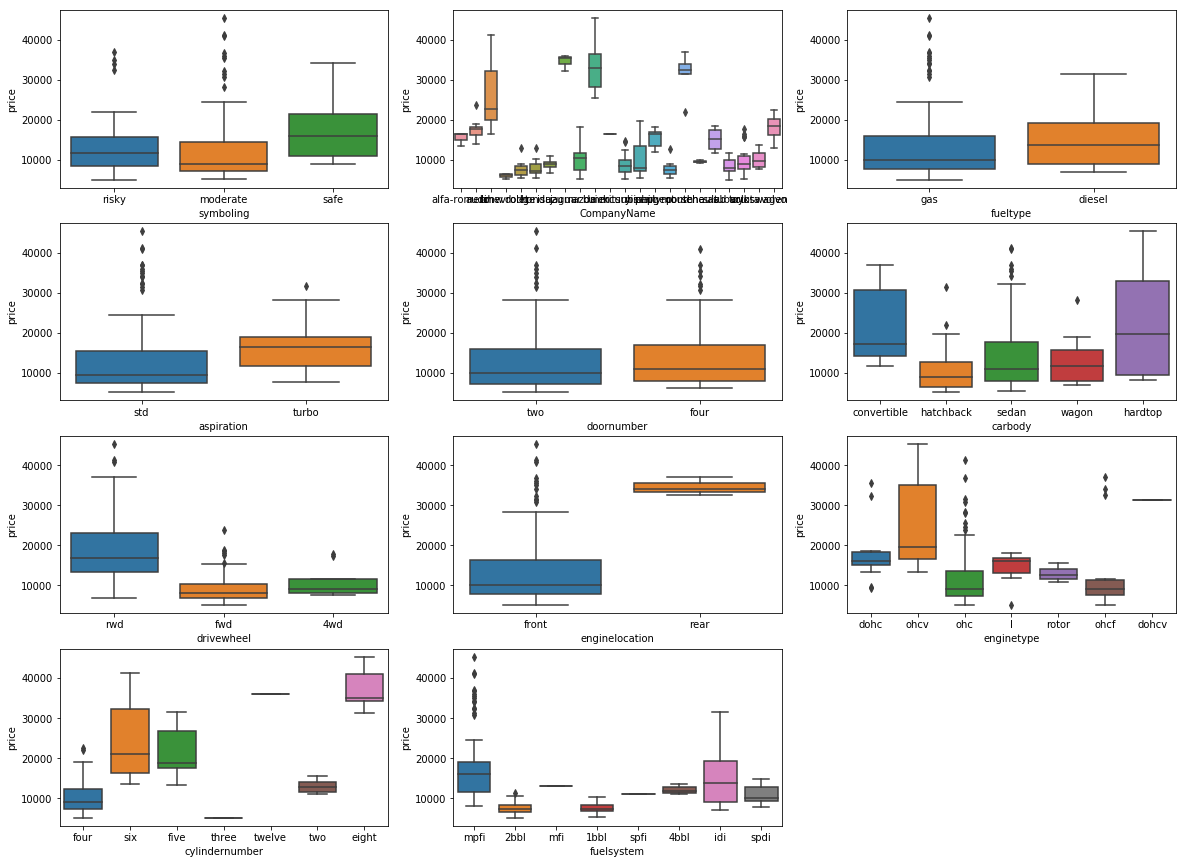

In [34]:
# plotting categorical variables vs price plots
plot_cat_target(categorical_variables[:]) 

##### Observations that can be drawn from categorical vars vs price:

- It seems that the symboling moderate category have high number of rows (i.e. They are most sold.), whereas safe are least sold(obviously price seems to be in higher category) 
- Toyota seems to be most favoured car company.
- Number of gas fueled cars are more than diesel. Also, diesel cars are expensive.
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)
- doornumber variable doesn't have much effect on price.
- sedan is the top car type prefered. Hardtop and convertible have higher average price.
- very significant difference in drivewheel category. Most high ranged cars seems to prefer rwd drivewheel.
- Could not sense engine location, as data points are too few.
- Engine type -ohc seems to be most favoured type. ohcv falls in the highest price range, ohc and ohcf falls into the low price range.
- Eight cylinders falls in the highest price range, while most common number of cylinders are four, six and five. Four being the most favourite.
- mpfi and idi falls in the highest price range. mpfi and 2bbl are most common type of fuel systems. But there are few data for other categories to derive any meaningful inference.

In [35]:
cars.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype='object')

### Now, lets deal with numerical variables
NumericalVars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

In [36]:
# getting numerical vars
numerical_vars =  ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                   'curbweight', 'enginesize', 'boreratio', 'stroke', 
                   'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
                   'price']


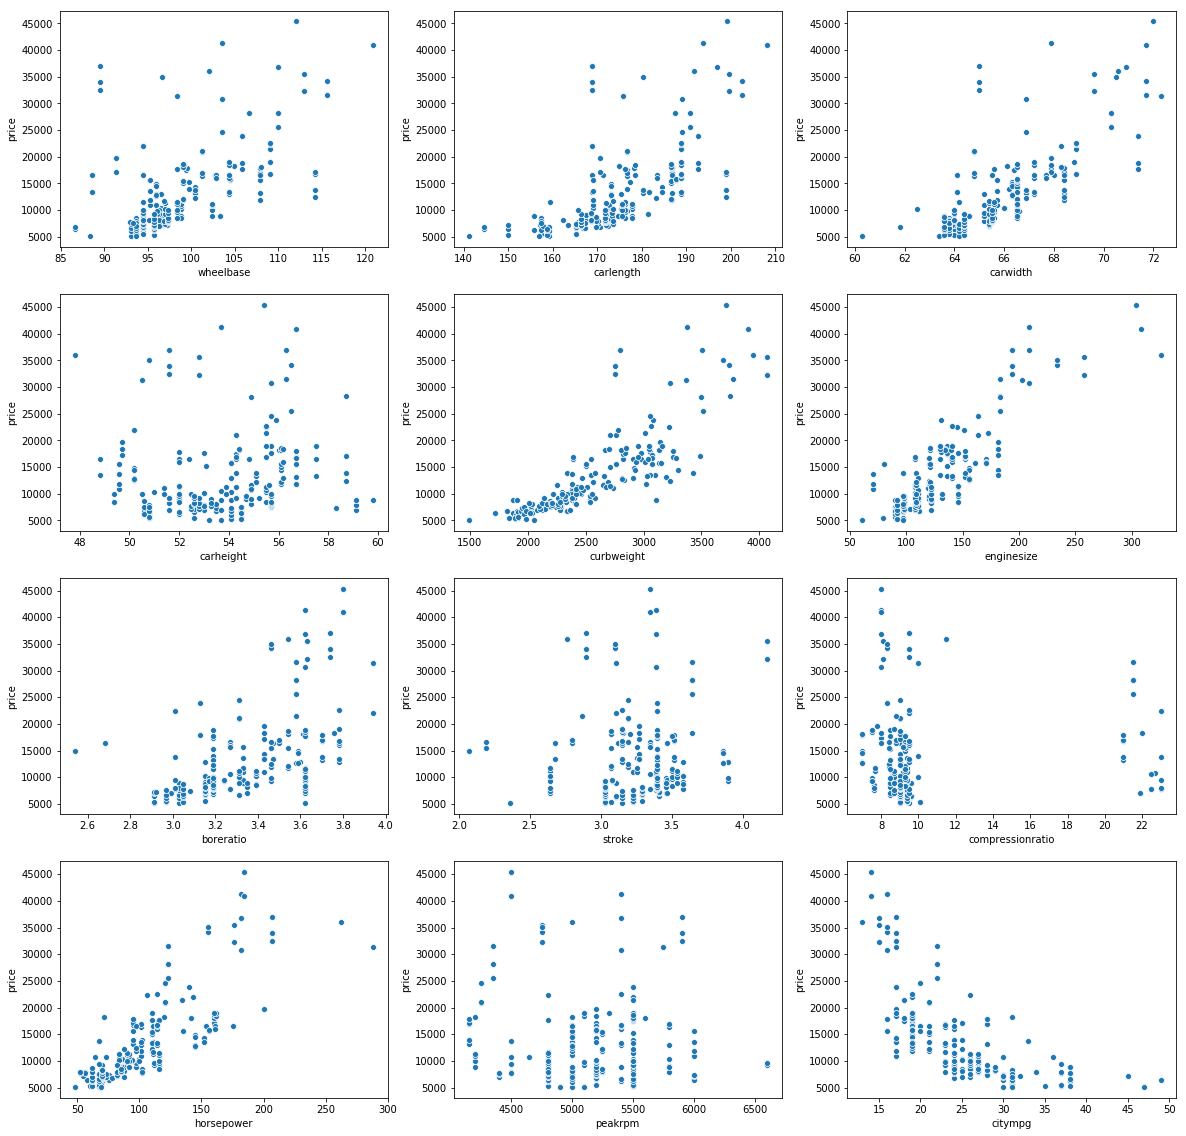

In [37]:
# plotting numerical variables vs price
plot_num_target(numerical_vars[:-1]) 

##### Observations that can be drawn from numerical vs price:

- It seems that the most cars has a wheel base around 95 inches and price has a slight positive correlation with wheelbase. 
- Car Width, Car Length and Curb weight has positive correlation with price, whereas with Car Height there is not much correlation.
- EngineSize, bore ratio and horsepower has positive correlation with price.
- citympg have negative correlation with price.

We have got few observations from above analysis,
Let's do some more analyses on variable using:  **Bi-Variate Analysis.**

#### 1. DriveWheel - Mileage
Taking x='citympg',y='price',hue='drivewheel'

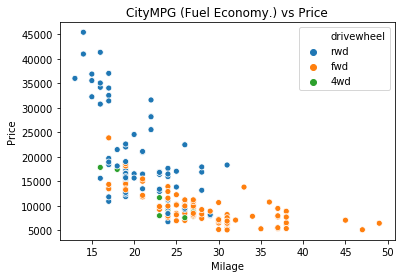

In [38]:
plt.title('CityMPG (Fuel Economy.) vs Price')
sns.scatterplot(x=cars['citympg'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Milage')
plt.ylabel('Price')

plt.show()

Clearly, Milage has negative correlation with price.

We can split Company names into high range, medium range and low rance as per their avg price,

As this Brand Category variable could be very informative in doing analysis on certain aspects like
- Fuel
- Horsepower etc


In [39]:
cars['brand_category'] = cars['price'].apply(lambda x : "Low end" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "High end"))

In [40]:
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,brand_category
0,risky,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,Mid_Range
1,risky,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,Mid_Range
2,moderate,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,Mid_Range
3,risky,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,Mid_Range
4,risky,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,Mid_Range


#### 2. Brand Category - Mileage
From domain knowledge, it is obvious that high end brands should not worry about milage.

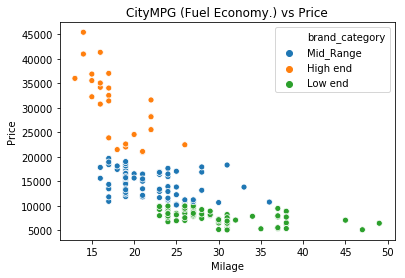

In [41]:
plt.title('CityMPG (Fuel Economy.) vs Price')
sns.scatterplot(x=cars['citympg'],y=cars['price'],hue=cars['brand_category'])
plt.xlabel('Milage')
plt.ylabel('Price')

plt.show()


Clearly, it is also visble what we concluded above from domain knowledge.

#### 3. Mileage - Fuel Type

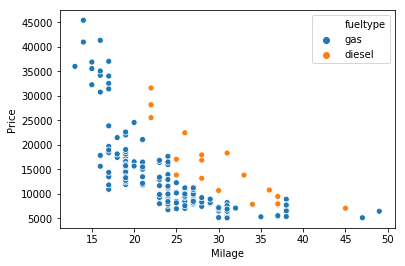

In [42]:
sns.scatterplot(x=cars['citympg'],y=cars['price'], hue=cars['fueltype'])
plt.xlabel('Milage')
plt.ylabel('Price')

plt.show()

#### 4. Horsepower - Fuel Type

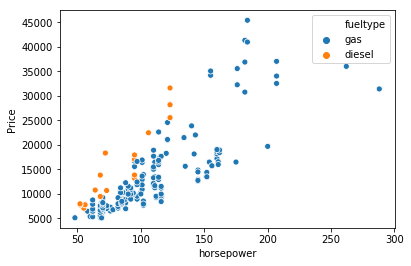

In [43]:
sns.scatterplot(x=cars['horsepower'],y=cars['price'], hue=cars['fueltype'])
plt.xlabel('horsepower')
plt.ylabel('Price')

plt.show()

#### 5. Brand Category - Horsepower

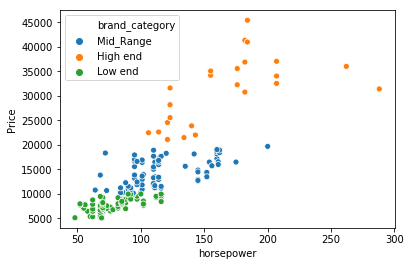

In [44]:
sns.scatterplot(x=cars['horsepower'],y=cars['price'], hue=cars['brand_category'])
plt.xlabel('horsepower')
plt.ylabel('Price')

plt.show()

Thus, from above analysis we can conclude the variables which are useful for our regression model.
And these are
[fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower',citympg, 'price', 'brand_category']

### Derived Metrics
From domanin knowledge it is known that power to weight ratio impacts price. Vehicles with a higher power to weight ratios are performance vehicles and will therefore be priced at higher rates.

In [45]:
#Creating Power to weight ratio derived metric column
cars['pwr_wt_ratio']=cars['horsepower']/cars['curbweight']
cars.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,brand_category,pwr_wt_ratio
0,risky,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,Mid_Range,0.043564
1,risky,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,Mid_Range,0.043564
2,moderate,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,Mid_Range,0.054552
3,risky,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,Mid_Range,0.043646
4,risky,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,Mid_Range,0.040722


**Building Regression Model**
We can build our regression model using above listed variables alongwith derived metrics.

For that, we need to store these variables in saparate dataframe.

In [46]:
cars_df = cars[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower','citympg', 'price', 'brand_category','pwr_wt_ratio']]

In [47]:
cars_df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,price,brand_category,pwr_wt_ratio
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,13495.0,Mid_Range,0.043564
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,16500.0,Mid_Range,0.043564
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,16500.0,Mid_Range,0.054552
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,13950.0,Mid_Range,0.043646
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,17450.0,Mid_Range,0.040722


In [48]:
cars_df.shape

(205, 17)

Let's plot this cars_df to have a look on the data we have now.

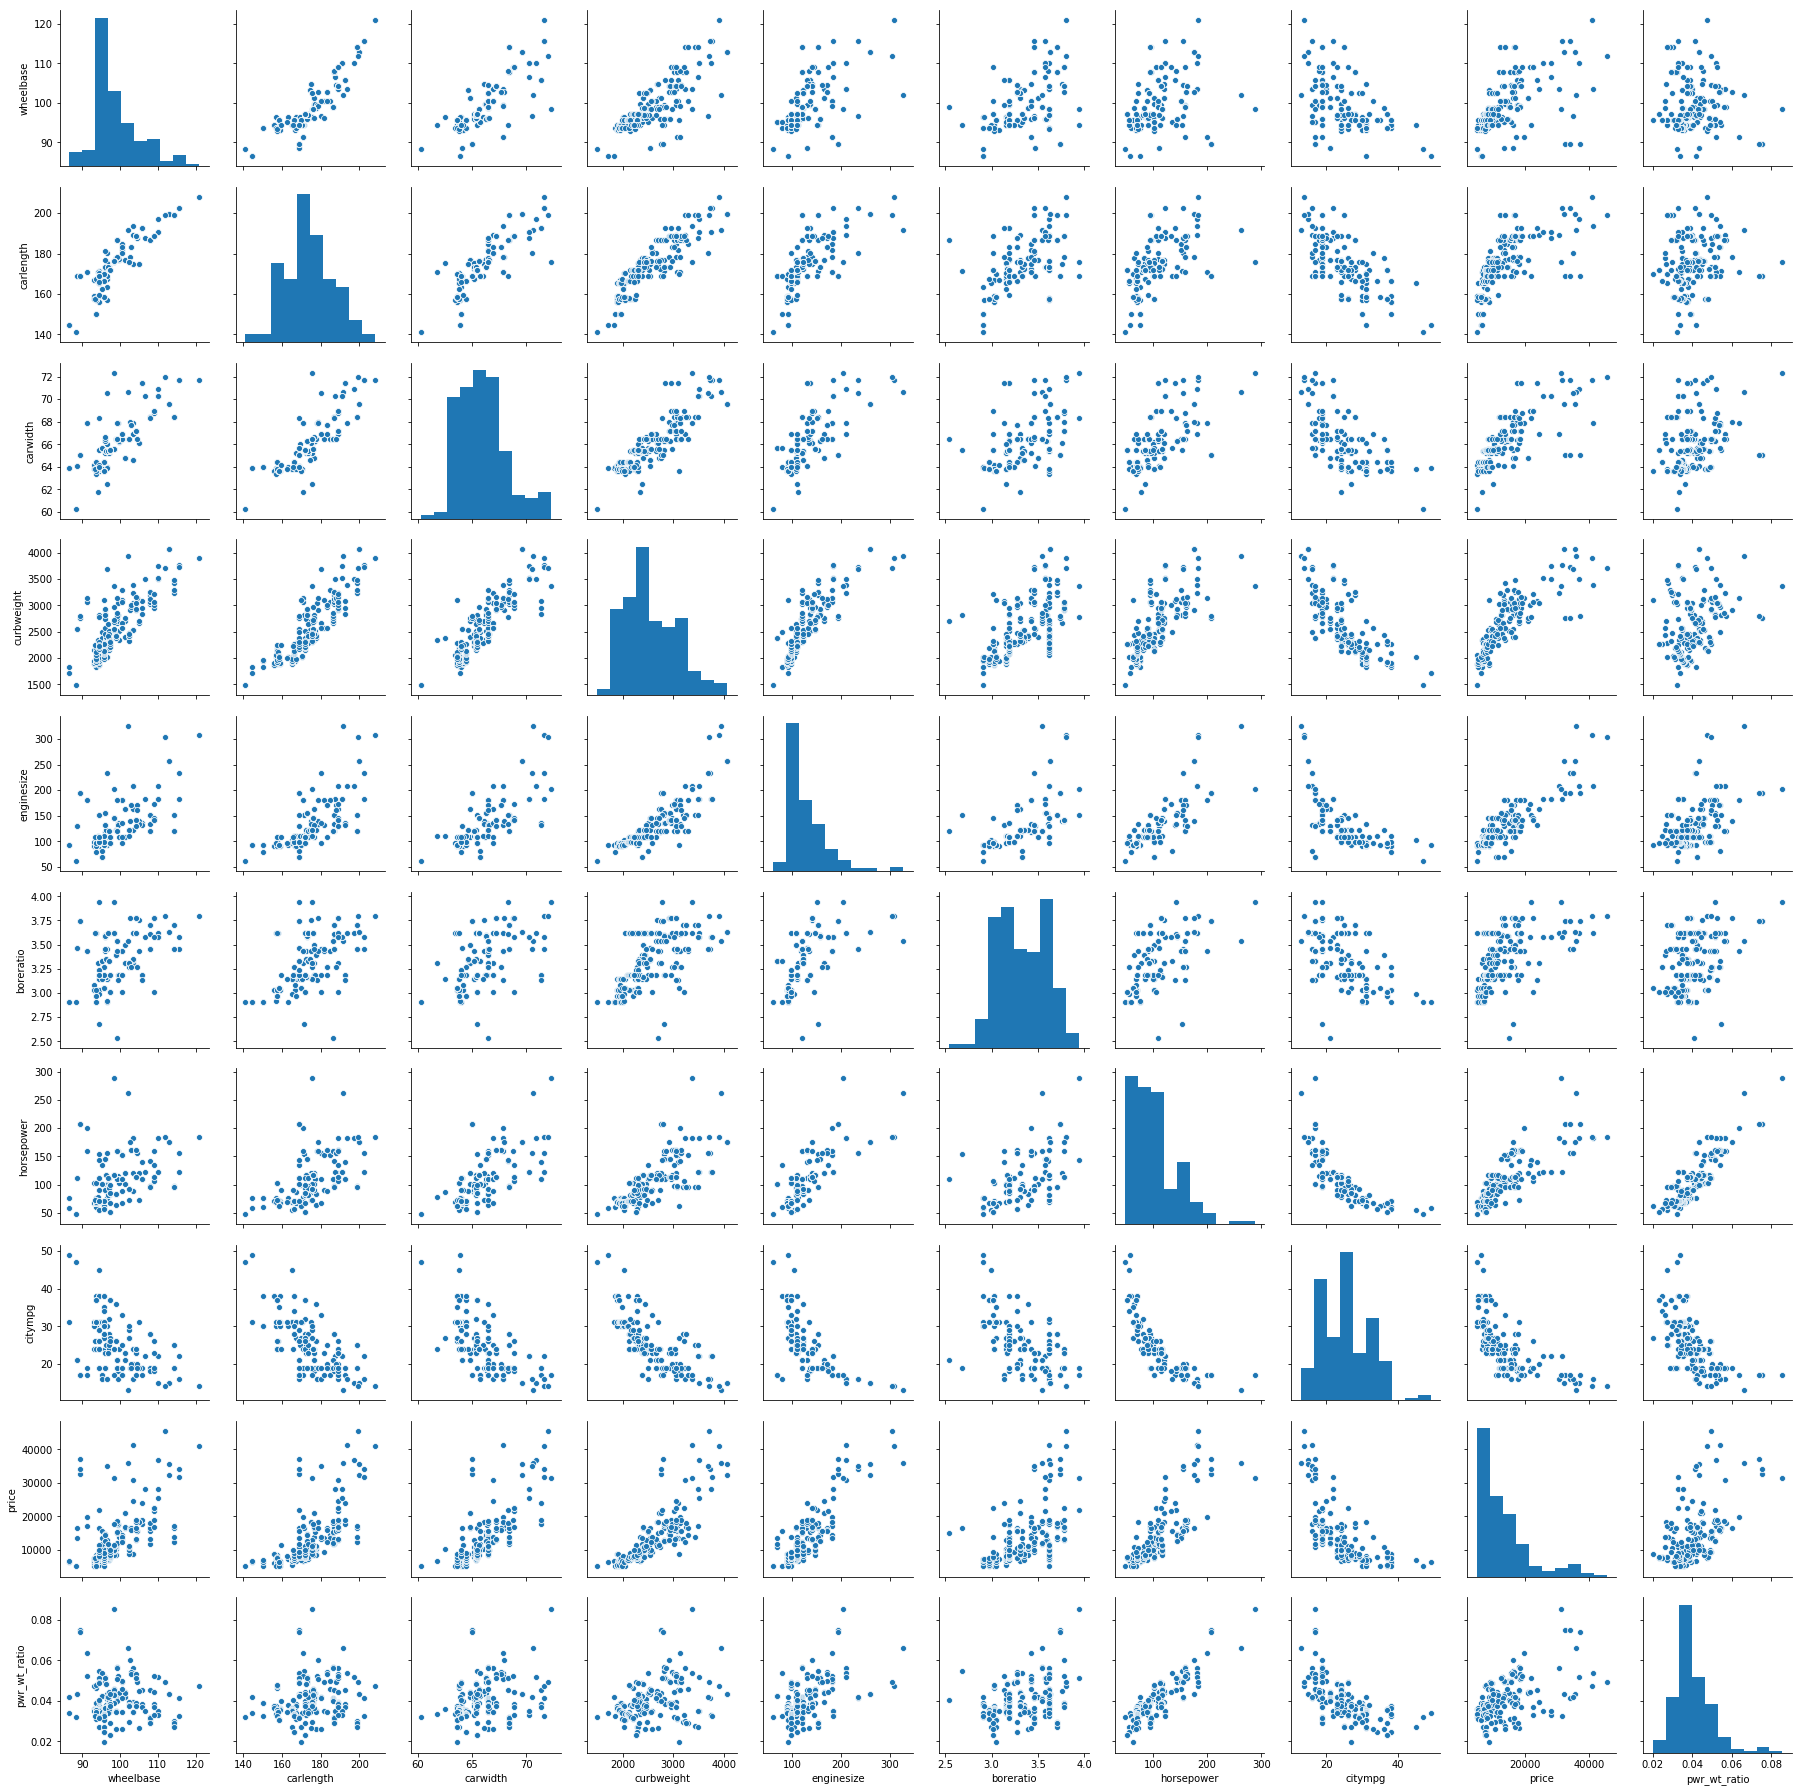

In [49]:
sns.pairplot(cars_df)
plt.show()

**Dealing with dummy variables**

In [50]:
cars_df = deal_with_dummies('fueltype',cars_df)
cars_df = deal_with_dummies('aspiration',cars_df)
cars_df = deal_with_dummies('carbody',cars_df)
cars_df = deal_with_dummies('drivewheel',cars_df)
cars_df = deal_with_dummies('enginetype',cars_df)
cars_df = deal_with_dummies('cylindernumber',cars_df)
cars_df = deal_with_dummies('brand_category',cars_df)

In [51]:
cars_df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'price', 'pwr_wt_ratio', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'Low end', 'Mid_Range'],
      dtype='object')

In [52]:
cars_df.shape

(205, 32)

In [53]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 32 columns):
wheelbase       205 non-null float64
carlength       205 non-null float64
carwidth        205 non-null float64
curbweight      205 non-null int64
enginesize      205 non-null int64
boreratio       205 non-null float64
horsepower      205 non-null int64
citympg         205 non-null int64
price           205 non-null float64
pwr_wt_ratio    205 non-null float64
gas             205 non-null uint8
turbo           205 non-null uint8
hardtop         205 non-null uint8
hatchback       205 non-null uint8
sedan           205 non-null uint8
wagon           205 non-null uint8
fwd             205 non-null uint8
rwd             205 non-null uint8
dohcv           205 non-null uint8
l               205 non-null uint8
ohc             205 non-null uint8
ohcf            205 non-null uint8
ohcv            205 non-null uint8
rotor           205 non-null uint8
five            205 non-null uint8
four    

## Splitting the Data into Training and Testing Sets

In [54]:
np.random.seed(0)
df_train, df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [55]:
scaler = MinMaxScaler()

In [56]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'price', 'pwr_wt_ratio']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,price,pwr_wt_ratio,...,ohcv,rotor,five,four,six,three,twelve,two,Low end,Mid_Range
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.068818,0.169146,...,0,0,0,1,0,0,0,0,1,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.466890,0.480607,...,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.122110,0.438242,...,0,0,0,1,0,0,0,0,1,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.314446,0.360040,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.382131,0.478148,...,0,0,0,1,0,0,0,0,0,1


In [57]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,price,pwr_wt_ratio,...,ohcv,rotor,five,four,six,three,twelve,two,Low end,Mid_Range
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.344211,0.219310,0.301305,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.496503,0.363636
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.186165,0.215682,0.139794,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.501745,0.482737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.166667,0.067298,0.218294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.333333,0.140343,0.268725,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.500000,0.313479,0.360401,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


To be sure, see Min is 0 and max is 1

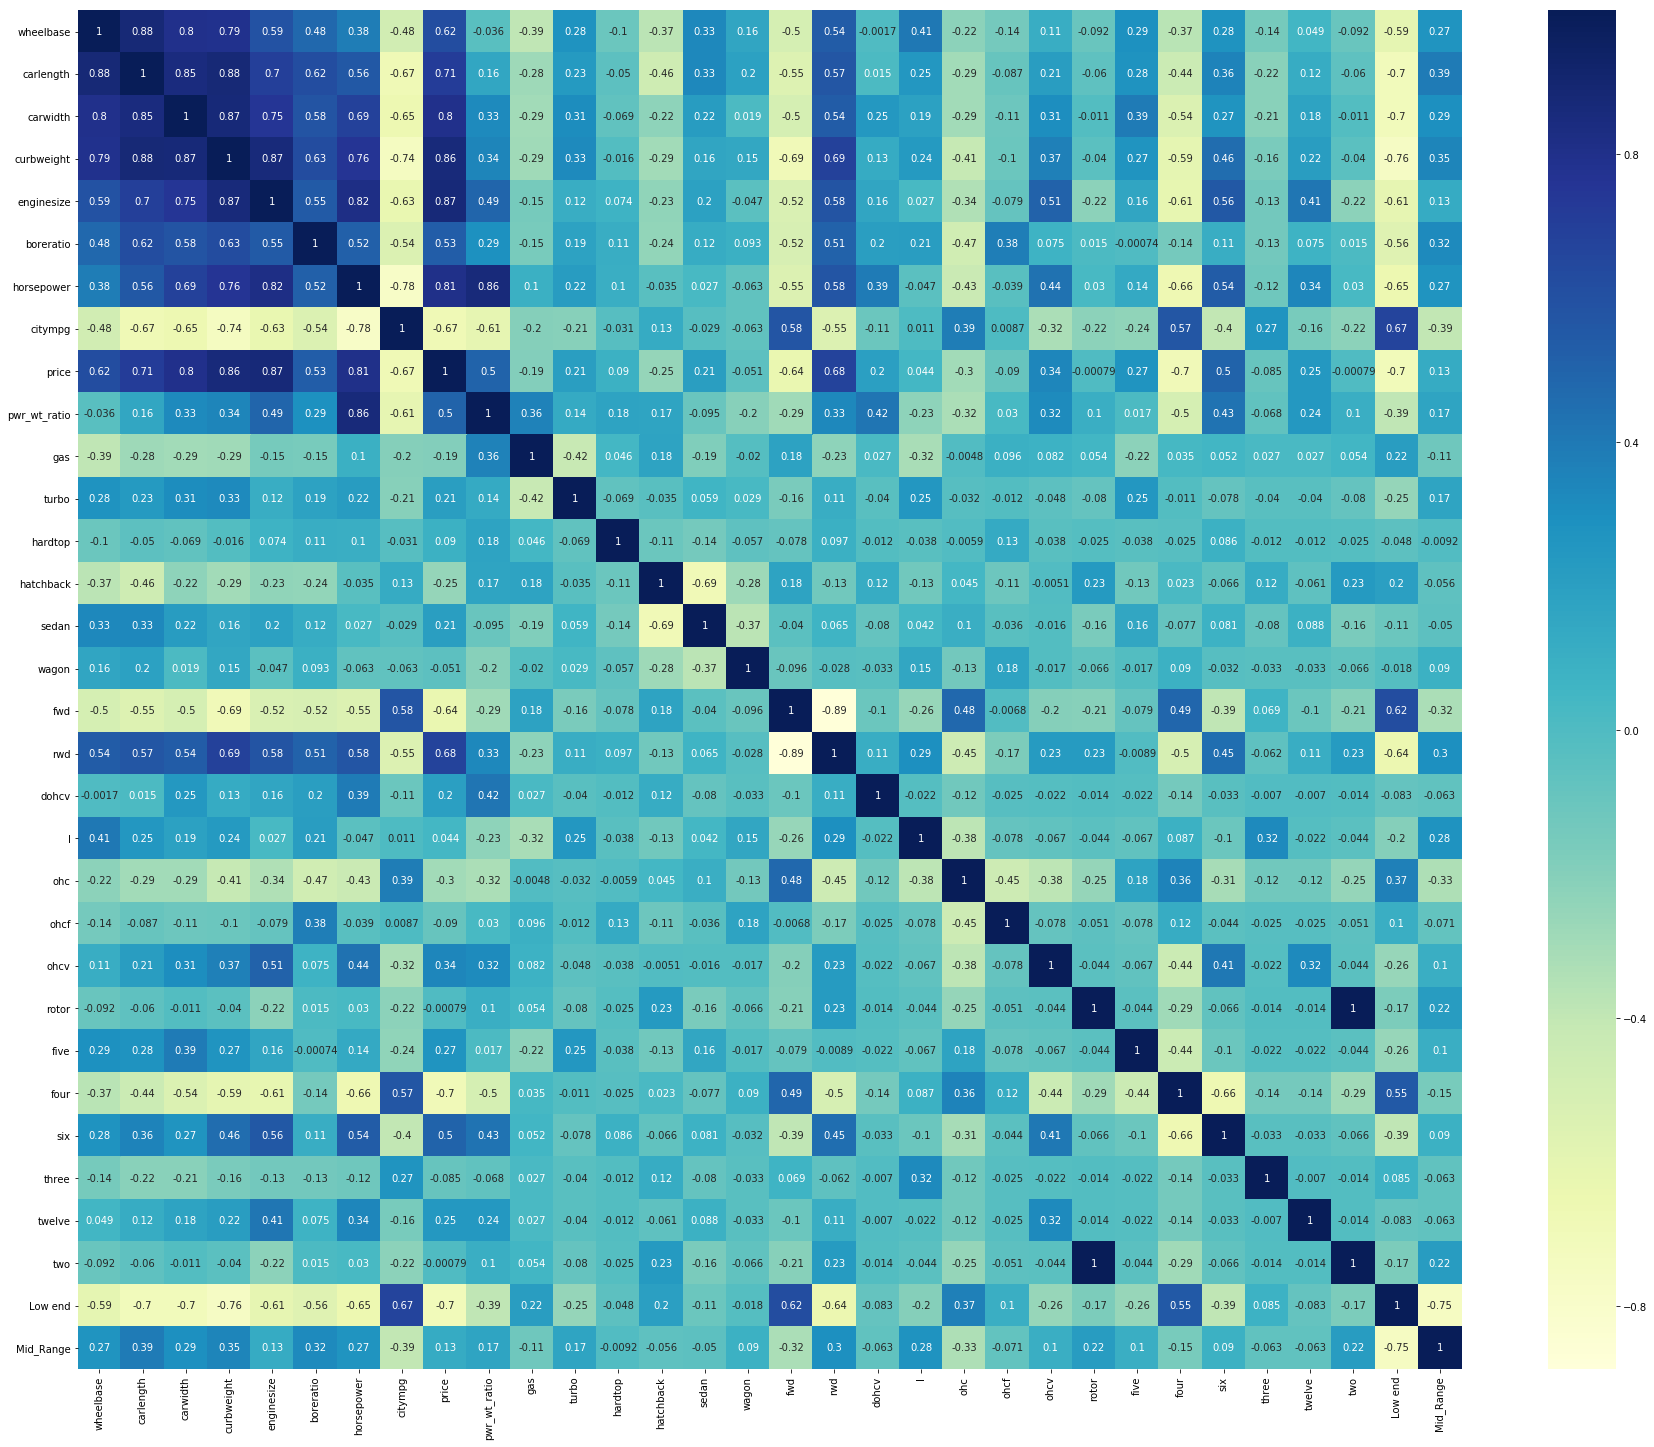

In [58]:
# Checking the correlation using heatmap among vars
plt.figure(figsize = (31, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Few of the Vars are highly correlated

### Dividing into X and Y sets for the model building

In [59]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Building our model

Using **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [60]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

# running RFE
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('carlength', False, 12),
 ('carwidth', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 10),
 ('boreratio', False, 2),
 ('horsepower', True, 1),
 ('citympg', False, 14),
 ('pwr_wt_ratio', True, 1),
 ('gas', True, 1),
 ('turbo', True, 1),
 ('hardtop', False, 8),
 ('hatchback', False, 5),
 ('sedan', False, 7),
 ('wagon', False, 6),
 ('fwd', False, 19),
 ('rwd', False, 22),
 ('dohcv', True, 1),
 ('l', False, 11),
 ('ohc', False, 16),
 ('ohcf', False, 13),
 ('ohcv', False, 20),
 ('rotor', False, 9),
 ('five', False, 17),
 ('four', False, 18),
 ('six', True, 1),
 ('three', False, 21),
 ('twelve', True, 1),
 ('two', False, 15),
 ('Low end', True, 1),
 ('Mid_Range', True, 1)]

In [62]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'pwr_wt_ratio', 'gas', 'turbo', 'dohcv',
       'six', 'twelve', 'Low end', 'Mid_Range'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [63]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,pwr_wt_ratio,gas,turbo,dohcv,six,twelve,Low end,Mid_Range
122,0.272692,0.083333,0.169146,1,0,0,0,0,1,0
125,0.500388,0.395833,0.480607,1,0,0,0,0,0,0
166,0.314973,0.266667,0.438242,1,0,0,0,0,1,0
1,0.411171,0.262500,0.360040,1,0,0,0,0,0,1
199,0.647401,0.475000,0.478148,1,1,0,0,0,0,1


#### Models using stats model

In [64]:
# Model-1
X_train_new = building_stats_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.48e-77
Time:                        21:06:53   Log-Likelihood:                 221.80
No. Observations:                 143   AIC:                            -421.6
Df Residuals:                     132   BIC:                            -389.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5408      0.073      7.386   

In [65]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,268.95
2,horsepower,195.69
3,pwr_wt_ratio,79.90
1,curbweight,55.63
9,Low end,7.53
10,Mid_Range,3.51
6,dohcv,2.63
8,twelve,2.52
7,six,2.50
4,gas,2.22


Deleting the curb weight as it has both high VIF(55.63) and high p-value(0.206)

In [66]:
X_train_new = X_train_rfe.drop(["curbweight"], axis = 1)

In [67]:
# Model-2
X_train_new = building_stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     241.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.63e-78
Time:                        21:06:53   Log-Likelihood:                 220.93
No. Observations:                 143   AIC:                            -421.9
Df Residuals:                     133   BIC:                            -392.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4531      0.025     18.441   

In [68]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,30.13
1,horsepower,14.01
2,pwr_wt_ratio,7.41
8,Low end,7.23
9,Mid_Range,3.49
6,six,2.35
3,gas,2.21
5,dohcv,1.95
4,turbo,1.87
7,twelve,1.70


Deleting the horsepower as it has both high VIF(14.01)

In [69]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

In [70]:
# Model-3
X_train_new = building_stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.98e-57
Time:                        21:06:53   Log-Likelihood:                 166.16
No. Observations:                 143   AIC:                            -314.3
Df Residuals:                     134   BIC:                            -287.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5937      0.032     18.655   

In [71]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,23.68
7,Low end,4.03
1,pwr_wt_ratio,3.50
8,Mid_Range,3.00
2,gas,2.20
5,six,2.00
3,turbo,1.75
4,dohcv,1.72
6,twelve,1.31


Dropping Six, as high p-value 0.791

In [72]:
X_train_new = X_train_new.drop(["six"], axis = 1)

In [73]:
# Model-4
X_train_new = building_stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.96e-58
Time:                        21:06:53   Log-Likelihood:                 166.13
No. Observations:                 143   AIC:                            -316.3
Df Residuals:                     135   BIC:                            -292.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5959      0.031     19.458   

In [74]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,22.08
6,Low end,3.38
1,pwr_wt_ratio,2.63
7,Mid_Range,2.58
2,gas,2.08
3,turbo,1.48
4,dohcv,1.40
5,twelve,1.15


Dropping twelve, high p-value 0.240

In [75]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)

In [76]:
# Model-5
X_train_new = building_stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.03e-59
Time:                        21:06:53   Log-Likelihood:                 165.39
No. Observations:                 143   AIC:                            -316.8
Df Residuals:                     136   BIC:                            -296.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5971      0.031     19.480   

In [77]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,22.06
5,Low end,3.37
6,Mid_Range,2.53
1,pwr_wt_ratio,2.41
2,gas,2.03
3,turbo,1.45
4,dohcv,1.35


Dropping turbo due to high p-value 0.217

In [78]:
X_train_new = X_train_new.drop(["turbo"], axis = 1)

In [79]:
# Model-6
X_train_new = building_stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.34e-59
Time:                        21:06:53   Log-Likelihood:                 164.59
No. Observations:                 143   AIC:                            -317.2
Df Residuals:                     137   BIC:                            -299.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5857      0.029     19.990   

In [80]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,20.08
4,Low end,3.35
5,Mid_Range,2.51
1,pwr_wt_ratio,2.09
2,gas,1.51
3,dohcv,1.29


dropping dohcv, high p-value 0.153

In [81]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)

In [82]:
# Model-7
X_train_new = building_stats_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     233.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.28e-60
Time:                        21:06:53   Log-Likelihood:                 163.52
No. Observations:                 143   AIC:                            -317.0
Df Residuals:                     138   BIC:                            -302.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5907      0.029     20.224   

In [83]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,19.80
3,Low end,3.34
4,Mid_Range,2.50
1,pwr_wt_ratio,1.70
2,gas,1.46


**Since p-values and VIF both are in permissible range, not dropping any more element**

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [84]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

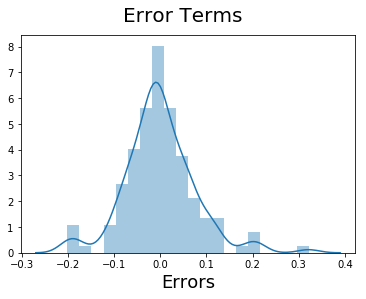

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From above, we see that errors terms are normally distributed.
**Also R sqr and adjusted r sqr are pretty good and within permissible range with one another.**

## Making Predictions

#### Applying the scaling on the test sets

In [86]:
#Scaling the test set
num_vars = ['wheelbase','carlength','carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg','price', 'pwr_wt_ratio']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('price')
X_test = df_test

In [88]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

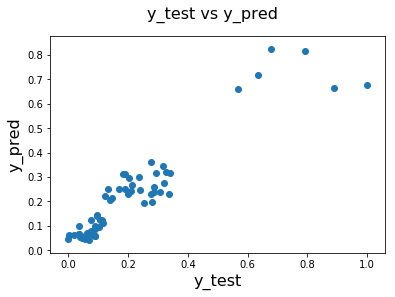

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=16)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Evaluating the r2_score(y_test, y_pred)

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.869750122635139

#### The test set has the model efficiency of approx 87%

**Comparing actual vs predicted**

Text(0, 0.5, 'Views')

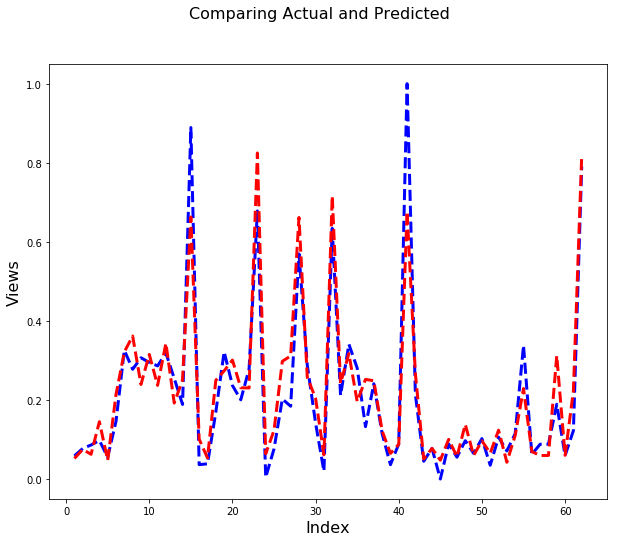

In [92]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c,y_test, color='blue', linewidth=3, linestyle="--")
plt.plot(c,y_pred, color='red',  linewidth=3, linestyle="--")
fig.suptitle('Comparing Actual and Predicted', fontsize=16)  
plt.xlabel('Index', fontsize=16)                            
plt.ylabel('Views', fontsize=16)  

### Conclusion drawn:
- R-sqaured and Adjusted R-squared (extent of fit) - 0.871 and 0.868 ~ 87% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 233.5 and approx. 0.0 - Model fit is significant and explained 87% variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - means, all the predictors are statistically significant.